<a href="https://colab.research.google.com/github/Mlkaz3/BankLoanApprovalPrediction/blob/master/ChanMeiHui_ChenCheeYong_OngYiJie_WinnieYapXiangLoo_BankLoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programme** : RDSY1S3

**Group Members**

1. Chan Mei Hui 19WMR11908

2. Chen Chee Yong 19WMR11909

3. Ong Yi Jie 19WMR11855

4. Winnie Yap Xiang Loo 19WMR11981



#**Bank Loan Approval Prediction** 
###**1. BUSINESS UNDERSTANDING**
#####**About Bank A**
Bank A is one of the largest banks in Southeast Asia offering a comprehensive range of financial services which include personal banking, commercial banking, investment banking, share broking, trustee services, nominee services, sale and management of unit trust funds. In the aspect of personal loan, the bank needs to determine whether a personnel is eligible and trustworthy for applications of loan. 

Loan analysis is an evaluation method that determines if loans are made on feasible terms and if potential borrowers can afford and are willing to pay back the loan. It checks the eligibility of the potential borrower against the criteria set forth for lending and gives the creditor a measure of safety on the loan by determining the probability that the borrower will pay back the loan’s principal and interest. 

#####**Objectives and Goals**

Bank A wants to automate the loan eligibility process depending on the customer details provided in the application form. These details are Marital Status, Number Of Dependents, Self_Employed Status, Applicants Income, Loan Amount, Loan Amount Term, Credit History, Property Area.

As the transaction records per second is surging at an exponential rate and increasing in terms of petabyte size, the main challenge for today’s Loan Eligibility Analysis is to analyze abundant data within a short period of time and produce high accuracy results . Therefore, the proposed goal of this project is to apply data science in the processing of the loan applications approval with a high accuracy. Hence, in order for Bank A to automate the loan approval process, we aim to process the customer’s data in the shortest time possible and identify the customer segments which are eligible for loan and allows the bank to target these customer specifically.

#####**Data Mining Success Criteria**#####
For our model to be considered a success, it should meet a minimum threshold of 80% in accuracy, precision and 85% in f1-score for prediction of loan approval. The prediction should be accurate and precise so that the bank does not suffer from a loss due to unrepayed loan interest.


###**2. DATA UNDERSTANDING**

####**Data Description Report**

|Element|Description|Data Type|
|------|------|------|
|Loan_ID|Unique Loan ID assigned to each applicants|Categorical (Ordinal)|
|Gender| Male / Female|Categorical (Nominal)|
|Married| Marital Status of applicants [Yes / No] |Categorical (Nominal)|
|Dependents| Number of dependents of applicants (Dependents are a person to whom one contributes major amont of necessary financial support)|Categorical(Ordinal)|
|Education| Applicants Eduction Status [Graduate / Not Graduate]|Categorical (Nominal)|
|Self_employed| Yes / No|Categorical (Nonimal)|
|Applicant's Income| Income of Applicants|Numerical (Continuous)|
|Coapplicant's Income| Incomes of Coapplicants|Numerical (Continuous)|
|LoanAmount| Loan amount applied in thousand|Numerical (Continuous)|
|Loan_Amount_Term| The time period to repay loan amount in terms of months|Categorical(Ordinal)|
|Credit_History| Measure of applicant's ability to repay debts and demonstrated responsibility in repaying debts. [1.0 / 0.0]|Categorical (Nominal)|
|Property_Area| Area of property owned by the applicants [Rural / Semiurban / Urban]|Categorical (Ordinal)
|Loan_Status| Application approval status [Yes / No]|Categorical (Nominal)|



#####**Importing libraries**#####

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import missingno as mn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report
from sklearn.model_selection import cross_val_score
import graphviz 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import itertools  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####**Load the dataset**

In [ ]:
bankloan_data = pd.read_csv('/content/drive/Shared drives/Data Science Assignment/bankloan_data.csv')

####**Explore Data**

Acquire basic info on the columns, number of rows, data types of the columns, and number of non-NULL values.



In [ ]:
bankloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#####**Obeservations**

1. There are a total of **13** columns in this dataset
2. There are a total of **614** entries in this dataset
3. There are **null** values in certain columns

#####**Verifying Data Quality**

Quick view of the dataset, listing out the first 10 rows from the dataset

In [ ]:
bankloan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Listing out the last 10 rows from the dataset

In [ ]:
bankloan_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


To check if there are any **duplicated** data in the dataset

In [ ]:
bankloan_data.duplicated().any()

False

- There are **no** duplicated values in the dataset

**Missing values visualization**

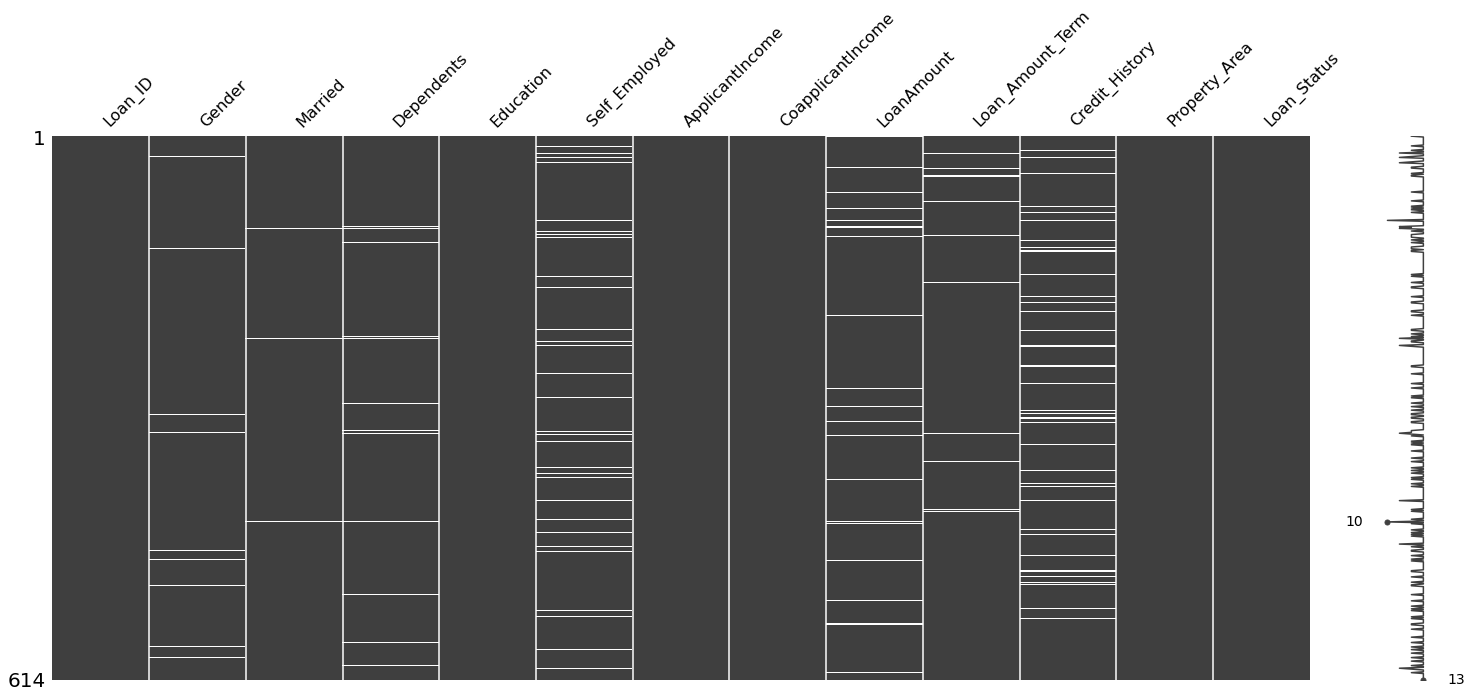

In [ ]:
mn.matrix(bankloan_data)

Percentage of exisiting NULL values


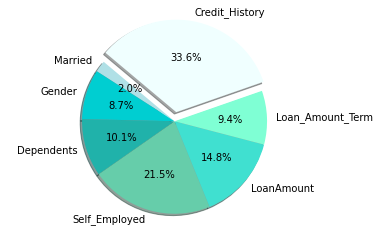

In [ ]:
gender = bankloan_data['Gender'].isna().sum()
married = bankloan_data['Married'].isna().sum()
dependents = bankloan_data['Dependents'].isna().sum()
self_employed = bankloan_data['Self_Employed'].isna().sum()
loanamount = bankloan_data['LoanAmount'].isna().sum()
loanamountterm = bankloan_data['Loan_Amount_Term'].isna().sum()
credithistory = bankloan_data['Credit_History'].isna().sum()

print("Percentage of exisiting NULL values")
labels = 'Married', 'Gender', 'Dependents', 'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'
sizes = [married,gender,dependents,self_employed,loanamount,loanamountterm,credithistory]
colors = ['powderblue', 'darkturquoise', 'lightseagreen','mediumaquamarine','turquoise', 'aquamarine','azure']
explode = (0, 0, 0, 0,0,0,0.1)  # explode last slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

To obtain the total number of **null** values in each columns

In [ ]:
bankloan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are NULL values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History.

To obtain the total number of non-zero values in each columns

In [ ]:
bankloan_data.astype(bool).sum(axis=0)

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    341
LoanAmount           614
Loan_Amount_Term     614
Credit_History       525
Property_Area        614
Loan_Status          614
dtype: int64

- Only CoapplicantIncome and Credit_History contain zero values

**Sorting data into categorical or numerical**

In [ ]:
categorical_elements = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History', 'Property_Area']
numerical_elements = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

print("Categorical elements:", categorical_elements)
print("Numerical elements:", numerical_elements)

Categorical elements: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Numerical elements: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


#####**Analysing Dataset**
Plotting **predictor variables** against **target variable** for **categorical** elements

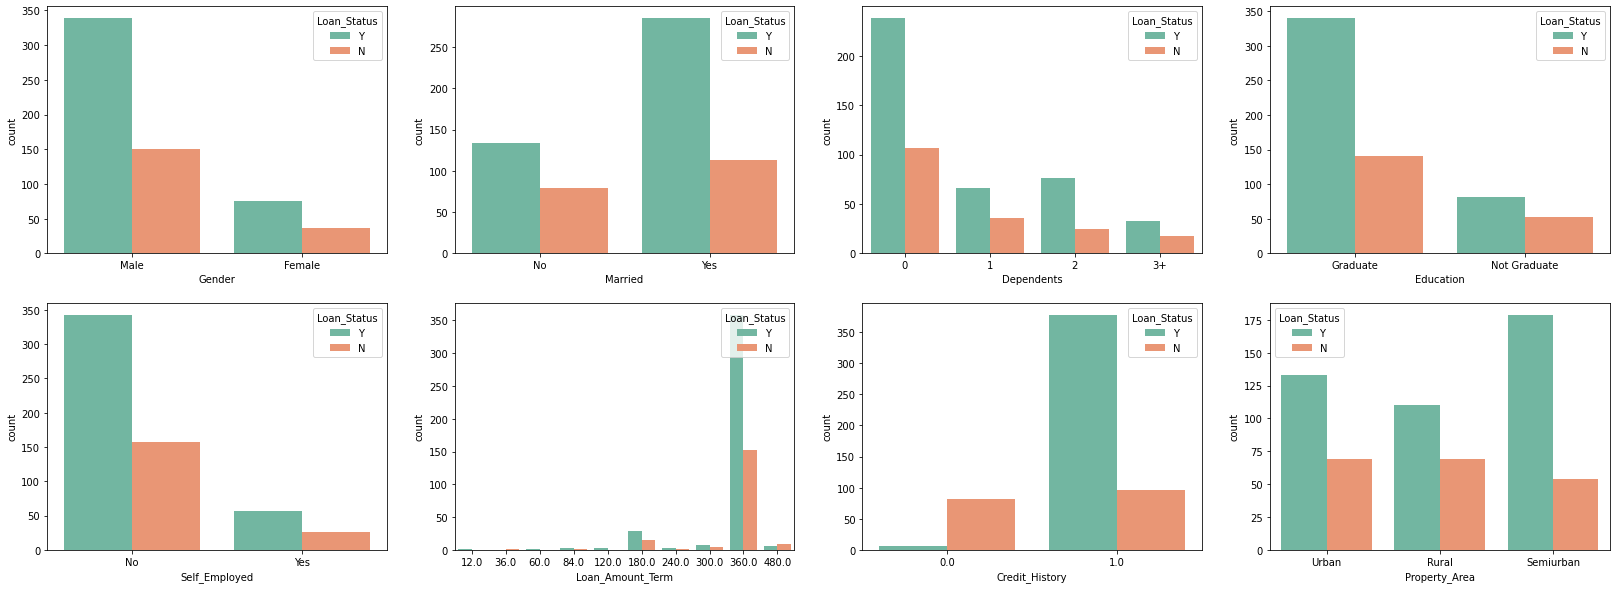

In [ ]:
fig,axes = plt.subplots(2,4,figsize=(28,10))
for idx,cat_col in enumerate(categorical_elements):
    row,col = idx//4,idx%4
    sn.countplot(x=cat_col,data=bankloan_data,hue='Loan_Status',ax=axes[row,col], palette = "Set2")

plt.subplots_adjust(hspace=0.2,wspace = 0.2)

**Analysis on the Graph of Categorical Elements**

1. The number of approved male applicants are approximately 4 times more than the female applicants.

2. The number of approved unmarried applicants is half the number of
approved married applicants.

3. Applicants with no dependents have the highest approval rate
compared to the rest.

4. Applicants with graduate status have higher chances of getting approved.

5. There are higher propotions of non-self employed applicants
compared to self-employed applicants.

6. Majority of approved applicants have loan amount term for 360 months.

7. Applicants with credit history [0] are most likely to be rejected.

8. Majority of the approved applicants have properties in semiurban areas.

**Graph of Percentage**

In [ ]:
categories = ['Approved Male','Approved Female', 'Rejected Male', 'Rejected Female', 'NULL']
print("Gender")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[55.2, 12.2, 24.4, 6, 2.2],
      theta=categories,
      fill='toself',
      name='Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

Gender


In [ ]:
categories = ['Approved Married','Rejected Married', 'Approved Unmarried', 'Rejected Unmarried', 'NULL']
print("Married")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[46.4, 18.4, 21.8, 12.9, 0.5],
      theta=categories,
      fill='toself',
      name='Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 50]
    )),
  showlegend=True
)

fig.show()

Married


In [ ]:
categories = ['[0]','[1]', '[2]', '[3+]', 'NULL']
print("Dependents")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[38.8, 10.7, 12.4, 5.4, 1.5],
      theta=categories,
      fill='toself',
      name='Approved Percentage'
))
fig.add_trace(go.Scatterpolar(
      r=[17.4, 5.9, 4.1, 2.9, 0.9],
      theta=categories,
      fill='toself',
      name='Rejected Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

Dependents


In [ ]:
categories = ['Approved Graduate','Rejected Graduate', 'Approved Non-Graduate', 'Rejected Non-Graduate']
print("Education")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[55.4, 22.8, 13.3, 8.5],
      theta=categories,
      fill='toself',
      name='Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

Education


In [ ]:
categories = ['Approved Self_Employed','Rejected Self_Employed', 'Approved Non-Self_Employed', 'Rejected Non-Self_Employed', 'NULL']
print("Self_Employed")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[9.1, 4.2, 55.9, 25.1, 5.7],
      theta=categories,
      fill='toself',
      name='Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

Self_Employed


In [ ]:
categories = ['Others','[180]', '[360]']
print("Loan_Amount_Term (Months)")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[4.2, 4.7, 58.5],
      theta=categories,
      fill='toself',
      name='Approved Percentage'
))
fig.add_trace(go.Scatterpolar(
      r=[2.9, 2.4, 24.9],
      theta=categories,
      fill='toself',
      name='Rejected Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

Loan_Amount_Term (Months)


In [ ]:
categories = ['Approved Credit 1.0','Rejected Credit 1.0', 'Approved Credit 0.0', 'Rejected Credit 0.0', 'NULL']
print("Credit_History")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[61.6, 15.8, 1.1, 13.4, 8.1],
      theta=categories,
      fill='toself',
      name='Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 70]
    )),
  showlegend=True
)

fig.show()

Credit_History


In [ ]:
categories = ['Rural','Semiurban', 'Urban']
print("Property_Area")
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[17.9, 29.2, 21.7],
      theta=categories,
      fill='toself',
      name='Approved Percentage'
))
fig.add_trace(go.Scatterpolar(
      r=[11.2, 8.8, 11.2],
      theta=categories,
      fill='toself',
      name='Rejected Percentage'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 30]
    )),
  showlegend=True
)

fig.show()

Property_Area


Plotting **predictor variables** against **target variable** for **numerical** elements

In [ ]:
bankloan_data[numerical_elements].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


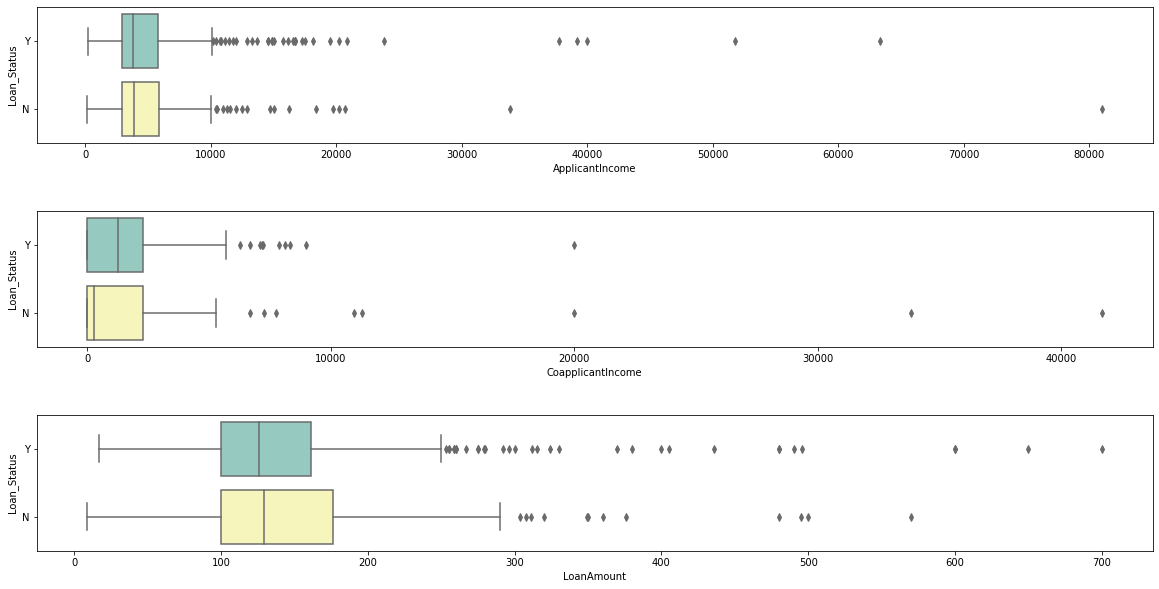

In [ ]:
fig,axes = plt.subplots(3,1,figsize=(20,10))
for idx,cat_col in enumerate(numerical_elements):
    sn.boxplot(x=cat_col,y='Loan_Status',data=bankloan_data,ax=axes[idx], palette="Set3")
plt.subplots_adjust(hspace=0.5)

**Analysis on Graph of Numerical Elements**

1. There are many outliers in the dataset but they will not be omitted because income and loan amount vary among individuals in real life.

####**Data Quality Report**

Target Variable - Loan_Status

Predictor Variable - Gender, Married, Dependents, Education, Self-Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area

Column to be dropped : Loan_ID 

**Solutions for data quality problems**

- For **NULL** values of **Numerical** elements, they shall be replaced with the **median** of the dataset.

- For **NULL** values of **Categorial** elements, it is decided to replaced them with the **mode** of the dataset. 

- **Keep** the outliers and **normalize** the numerical elements.

- Since zero value in 'CoapplicantIncome' implies there is no co-applicant or the coapplicant has no income for the application, it will **not** be replaced or removed from the dataset.

- Also, there is **no need** to deal with the zero values in 'Credit_History' as it is encoded as 1.0 and 0.0 where 1.0 represents good credit history and 0.0 represents bad credit history.

###**3. DATA PREPARATION**

#####**Rationale for inclusion/exclusion**

**Data to be included**

|Included Data|Reasons|
|------|------|
|Gender|Relevance of gender and credit availability might be necessary for prediction|
|Married|Marital status indirectly affect the financial stability of the applicants|
|Dependents|The number of dependents is equivalent to the financial commitments of an individual|
|Education|Applicant's education level will affect the employment status stability|
|Self_Employed|Employment status is important in determining the risk of applicants financial crisis|
|ApplicantIncome & CoapplicantIncome|Applicant and Coapplicant income is required to estimate the amount of loan that one is able to borrow|
|LoanAmount|Loan amount is needed to estimate the applicant's loan eligibility |
|Loan_Amount_Term|A loan's term affects the monthly payment and the total interest costs|
|Credit_History|It is a record of a borrower's responsible repayment of debts|
|Property_Area|Relevance of property owned by loan applicant might be considered for prediction|
|Loan_Status|An indication of applicant being approved or rejected|

**Data to be excluded**

|Excluded Data|Reasons|
|------|------|
|Loan_ID |It is irrelevant and not a factor to be considered during loan approval analysis process.|

In [ ]:
bankloan_data.drop(['Loan_ID'], axis = 1, inplace = True) 

- Dealing with **NULL** values of **numerical** elements by replacing with **median** value


In [ ]:
median = bankloan_data['LoanAmount'].median()
bankloan_data['LoanAmount'].fillna(median, inplace=True)
print('The NULL values of LoanAmount are replaced with', median)

The NULL values of LoanAmount are replaced with 128.0


- Dealing with **NULL** values of **categorical** elements by replacing with **mode** value

In [ ]:
mode = bankloan_data['Gender'].mode()
bankloan_data['Gender'].fillna(bankloan_data['Gender'].mode()[0], inplace=True)
print('The NULL values of Gender are replaced with', mode[0])

The NULL values of Gender are replaced with Male


In [ ]:
mode = bankloan_data['Married'].mode()
bankloan_data['Married'].fillna(bankloan_data['Married'].mode()[0], inplace=True)
print('The NULL values of Married are replaced with', mode[0])

The NULL values of Married are replaced with Yes


In [ ]:
mode = bankloan_data['Dependents'].mode()
bankloan_data['Dependents'].fillna(bankloan_data['Dependents'].mode()[0], inplace=True)
print('The NULL values of Dependents are replaced with', mode[0])

The NULL values of Dependents are replaced with 0


In [ ]:
mode = bankloan_data['Self_Employed'].mode()
bankloan_data['Self_Employed'].fillna(bankloan_data['Self_Employed'].mode()[0], inplace=True)
print('The NULL values of Self_Employed are replaced with', mode[0])

The NULL values of Self_Employed are replaced with No


In [ ]:
mode = bankloan_data['Loan_Amount_Term'].mode()
bankloan_data['Loan_Amount_Term'].fillna(bankloan_data['Loan_Amount_Term'].mode()[0], inplace=True)
print('The NULL values of Loan_Amount_Term are replaced with', mode[0])

The NULL values of Loan_Amount_Term are replaced with 360.0


In [ ]:
mode = bankloan_data['Credit_History'].mode()
bankloan_data['Credit_History'].fillna(bankloan_data['Credit_History'].mode()[0], inplace=True)
print('The NULL values of Credit_History are replaced with', mode[0])

The NULL values of Credit_History are replaced with 1.0


####**Encoding categorical elements**

Columns that need to be encoded:

a. Ordinal elements (Ordinal encoding) - Dependents, Property_Area

b. Nominal elements (One Hot encoding) -  Gender, Married, Education, Self_Employed

c. Nominal elements (Label Encoding) - Loan_Status



In [ ]:
#Ordinal elements
#-Ordinal encoder
bankloan_data['Dependents'] = OrdinalEncoder().fit_transform(bankloan_data.Dependents.values.reshape(-1,1))
bankloan_data['Property_Area'] = OrdinalEncoder().fit_transform(bankloan_data.Property_Area.values.reshape(-1,1))

#Nominal elements
#-Label encoder
bankloan_data['Loan_Status'] = LabelEncoder().fit_transform(bankloan_data.Loan_Status)
#-One Hot Encoder
bankloan_data['Gender'] = OneHotEncoder().fit_transform(bankloan_data.Gender.values.reshape(-1,1)).toarray()
bankloan_data['Married'] = OneHotEncoder().fit_transform(bankloan_data.Married.values.reshape(-1,1)).toarray()
bankloan_data['Education'] = OneHotEncoder().fit_transform(bankloan_data.Education.values.reshape(-1,1)).toarray()
bankloan_data['Self_Employed'] = OneHotEncoder().fit_transform(bankloan_data.Self_Employed.values.reshape(-1,1)).toarray()

bankloan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,1.0,1.0,5849,0.0,128.0,360.0,1.0,2.0,1
1,0.0,0.0,1.0,1.0,1.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,0.0,0.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,0.0,1.0,0.0,1.0,1.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,0.0,1.0,1.0,2900,0.0,71.0,360.0,1.0,0.0,1
610,0.0,0.0,3.0,1.0,1.0,4106,0.0,40.0,180.0,1.0,0.0,1
611,0.0,0.0,1.0,1.0,1.0,8072,240.0,253.0,360.0,1.0,2.0,1
612,0.0,0.0,2.0,1.0,1.0,7583,0.0,187.0,360.0,1.0,2.0,1


|Elements|Encodings|
|------|------|
|Dependents|0.0 - No dependent, 1.0 - One dependents, 2.0 - Two dependents, 3.0 - Three or more dependents|
|Property_Area|0.0 - Rural, 1.0 - Semiburban, 2.0 - Urban|
|Gender|0.0 - Male, 1.0 - Female|
|Married|0.0 - Yes, 1.0 - No|
|Education|0.0 - Not Graduate, 1.0 - Graduate|
|Self_Employed|0.0 - Yes, 1.0 - No|
|Loan_Status|0 - No, 1 - Yes|

####**Train-Test Split**

In [ ]:
X = bankloan_data.drop(columns='Loan_Status')
y = bankloan_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

- Dealing with **outliers**

**Normalizing the numerical elements** with outliers

In [ ]:
# data normalization with sklearn

# copy of datasets
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# numerical features
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm [[i]])
    
    # transform the training data column
    X_train_norm [i] = scale.transform(X_train_norm [[i]])
    
    # transform the testing data column
    X_test_norm [i] = scale.transform(X_test_norm [[i]])


X_train_norm 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,0.0,1.0,0.0,1.0,1.0,0.037678,0.000000,0.059334,360.0,1.0,2.0
239,0.0,0.0,1.0,1.0,1.0,0.038433,0.000000,0.125904,360.0,1.0,1.0
448,0.0,0.0,2.0,1.0,1.0,0.038742,0.041040,0.204052,360.0,0.0,0.0
471,0.0,0.0,1.0,0.0,1.0,0.030239,0.036000,0.150507,180.0,0.0,0.0
273,0.0,0.0,0.0,1.0,1.0,0.029830,0.053352,0.204052,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,1.0,0.0,1.0,1.0,0.034175,0.066983,0.195369,360.0,1.0,1.0
349,0.0,0.0,0.0,1.0,1.0,0.029892,0.149999,0.257598,360.0,1.0,0.0
26,0.0,0.0,0.0,1.0,1.0,0.032046,0.054072,0.163531,360.0,1.0,1.0
96,1.0,0.0,0.0,1.0,1.0,0.028147,0.055248,0.185239,360.0,1.0,1.0


In [ ]:
X_test_norm 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
150,0.0,1.0,0.0,1.0,1.0,0.075096,0.000000,0.157742,360.0,0.0,0.0
559,1.0,0.0,0.0,1.0,1.0,0.049140,0.055344,0.250362,360.0,1.0,1.0
598,0.0,0.0,0.0,1.0,0.0,0.120720,0.000000,0.247467,360.0,1.0,0.0
235,0.0,0.0,1.0,1.0,1.0,0.065478,0.030240,0.232996,360.0,1.0,0.0
145,1.0,0.0,0.0,1.0,1.0,0.026241,0.107663,0.131693,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
363,0.0,0.0,0.0,1.0,1.0,0.034695,0.072791,0.124457,300.0,1.0,2.0
280,0.0,1.0,1.0,0.0,0.0,0.047568,0.058224,0.215630,360.0,0.0,2.0
7,0.0,0.0,3.0,1.0,1.0,0.034980,0.060096,0.215630,360.0,0.0,1.0
289,0.0,1.0,0.0,1.0,1.0,0.115089,0.000000,0.257598,360.0,1.0,0.0


###**4. DATA MODELLING**




####**Decision Tree**####

**Train Data**

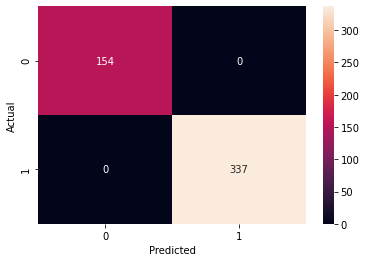

Training Data Accuracy:  1.0
Training Data Precision  1.0
Training Data F1 Score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_norm,y_train)
y_pred = decision_tree.predict(X_train_norm)

confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print(classification_report(y_train, y_pred))

**The problem of overfitting**

- Training Accuracy > Test Accuracy with default settings of Decision Tree classifier

- Solution : Hyper-parameter tuning

**Tuning the 'Max_Depth' of tree**

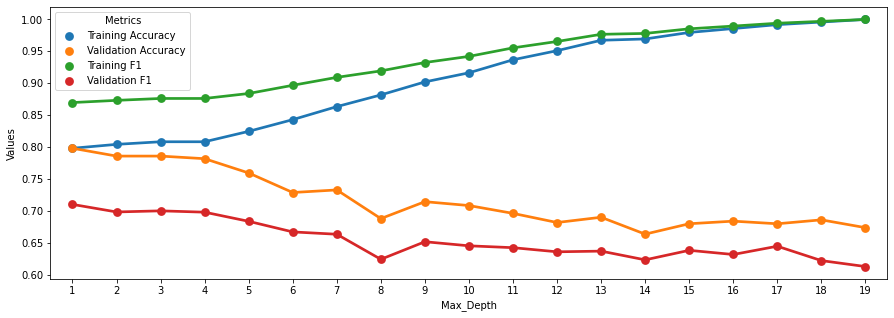

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train_norm,y_train)
    y_training_pred = decision_tree.predict(X_train_norm)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(decision_tree,X_train_norm,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(decision_tree,X_train_norm,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sn.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

- From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy ~ 0.78 and Optimum F1 Score: ~ 0.70.

**Visulazing Decision Tree with Max Depth = 3**

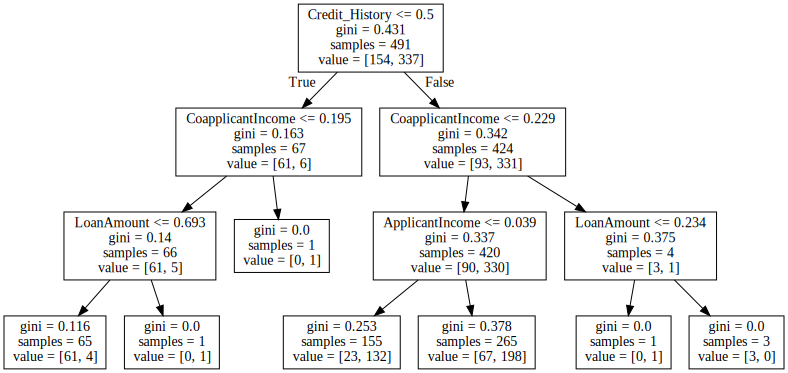

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_norm,y_train)
dot_data = tree.export_graphviz(decision_tree,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

- From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit.

**Tuning the 'Min Sample Leaf'** to improve test accuracy

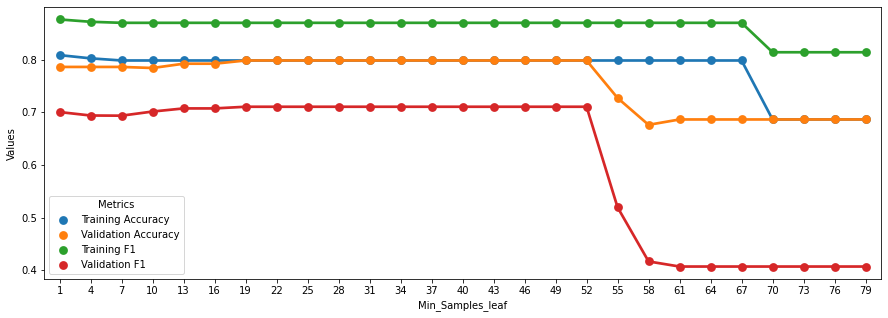

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3):
    decision_tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    decision_tree.fit(X_train_norm,y_train)
    y_training_pred = decision_tree.predict(X_train_norm)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(decision_tree,X_train_norm,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(decision_tree,X_train_norm,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sn.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

- From above plot, we will choose Min_Samples_leaf = 35 to improve test accuracy.

**Test Data Evaluation**

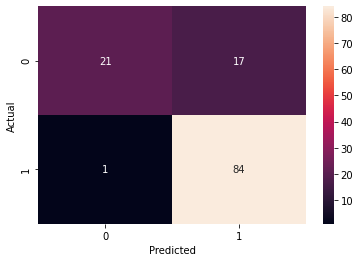

Test Data Accuracy:  0.8536585365853658
Test Data Precision  0.8316831683168316
Test F1 Score:  0.903225806451613
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 35)
decision_tree.fit(X_train_norm,y_train)
y_pred = decision_tree.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Test Data Accuracy: ', accuracy_score(y_test, y_pred))
print('Test Data Precision ', precision_score(y_test,y_pred))
print('Test F1 Score: ',f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

*   TN = True Negatives = 21
*   FP = False Positives = 17
*   FN = False Negatives = 1
*   TP = True Positives = 84
- Decision Tree classifier gives accuracy of 85%, precision of 83% and most importantly f1-score of 90%.

Note: We shall focus more on f1-score since our dataset is imbalanced.

**Feature Importance**

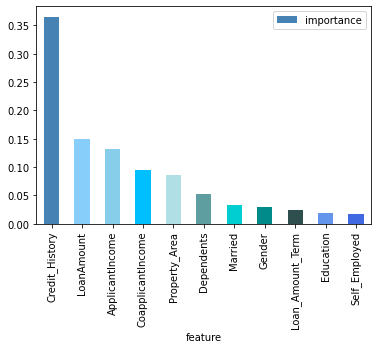

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_test_norm,y_test)

fi = model.feature_importances_

feature_cols = X_test_norm.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": model.feature_importances_}
)

importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": model.feature_importances_[:]}
)

importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)

my_colors = 'steelblue', 'lightskyblue', 'skyblue', 'deepskyblue', 'powderblue', 'cadetblue', 'darkturquoise', 'darkcyan', 'darkslategray', 'cornflowerblue', 'royalblue'
importance[:12].plot(x="feature", y="importance", kind="bar", color=my_colors)


Top features: Credit_History, LoanAmount, ApplicantIncome

- These 3 features were used to re-run the Decision Tree Classifier and there was no visible improvement seen in the accuracy, precision and f1-score. Hence, we will use all features in this model.

####**Random Forest**

**Train Data**

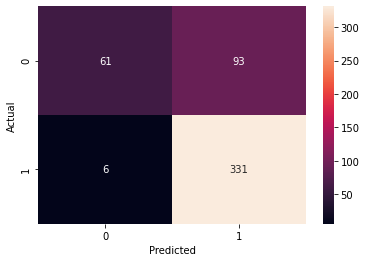

Training Data Accuracy:  0.7983706720977597
Training Data Precision  0.7806603773584906
Training F1 Score:  0.8699080157687253
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [ ]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10, random_state = 42)
random_forest.fit(X_train_norm,y_train)
y_pred = random_forest.predict(X_train_norm)

confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training F1 Score: ",f1_score(y_train,y_pred))
print(classification_report(y_train, y_pred))

**Test Data Evaluation**

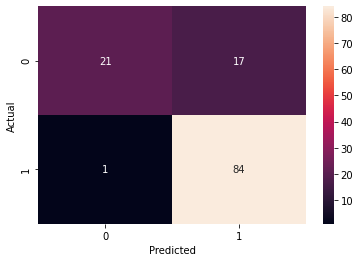

Test Data Accuracy:  0.8536585365853658
Test Data Precision  0.8316831683168316
Test F1 Score:  0.903225806451613
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
y_pred = random_forest.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Test Data Accuracy: ', accuracy_score(y_test, y_pred))
print("Test Data Precision ", precision_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

*   TN = True Negatives = 21
*   FP = False Positives = 17
*   FN = False Negatives = 1
*   TP = True Positives = 84

- Random Forest gives same results as Decision Tree Classifier.

**Feature Importance**

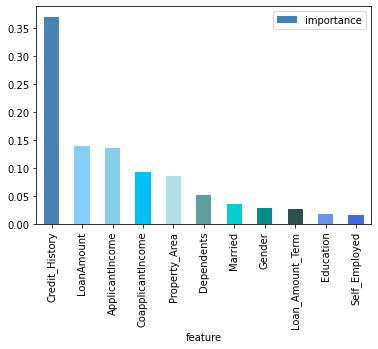

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_test_norm,y_test)

fi = model.feature_importances_

feature_cols = X_test_norm.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": model.feature_importances_}
)

importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": model.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
my_colors = 'steelblue', 'lightskyblue', 'skyblue', 'deepskyblue', 'powderblue', 'cadetblue', 'darkturquoise', 'darkcyan', 'darkslategray', 'cornflowerblue', 'royalblue'
importance[:12].plot(x="feature", y="importance", kind="bar", color=my_colors)

Top features: Credit_History, LoanAmount, ApplicantIncome

- These 3 features were used to re-run the Random Forest Classifier and there was no visible improvement seen in the accuracy, precision and f1-score. Hence, we will use all features in this model.

####**Support Vector Machine (SVM)**

**Train Data**

In [ ]:
cls = svm.SVC(kernel="linear", probability = True)
#train the model
cls.fit(X_train_norm,y_train)
#predict the response
y_pred = cls.predict(X_train_norm)

confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training F1 Score: ",f1_score(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

**Test Data Evaluation**

In [ ]:
y_pred = cls.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

plt.show()
print('Test Data Accuracy: ', accuracy_score(y_test, y_pred))
print("Test Data Precision ", precision_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

*   TN = True Negatives = 21
*   FP = False Positives = 17
*   FN = False Negatives = 1
*   TP = True Positives = 84

- SVM gives same results as Decision Tree and Random Forest Classifiers. 

**Feature Importance**


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_test_norm)
model=svm.SVC(kernel='linear', probability = True)

a=model.fit(X_test_norm,y_test)
model.score(X_test_norm,y_test)

feature_names = vectorizer.get_feature_names() 
coefs_with_fns = sorted(zip(model.coef_[0], feature_names)) 
df=pd.DataFrame(coefs_with_fns)
df.columns='Coefficient','Feature'
df.sort_values(by='Coefficient')

#plot graph of feature importances for better visualization
plt.figure(figsize =(20,10))
feat_importances = pd.Series(model.coef_[0], feature_names)
my_color =['mediumspringgreen','mediumaquamarine','aquamarine','turquoise','lightseagreen','mediumturquoise','seagreen','green','darkgreen','limegreen','forestgreen']
feat_importances.nlargest(11).plot(kind='barh',color=my_color)
plt.show()

Top feature: Property_Area

- This feature were used to re-run the SVM model and there was no visible improvement seen in the accuracy, precision and f1-score. Hence, we will use all features in this model.

####**Logistic Regression**####

**Train Data and Test Data Evaluation**

In [ ]:
training_acc = []
training_f1 = []
testing_acc = []
testing_f1 = []
thresholds = []

for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear',penalty = 'l2', C = 0.1,random_state = 42)
    logreg_clf.fit(X_train_norm,y_train)
    
    y_training_pred_thresh = logreg_clf.predict_proba(X_train_norm)[:,1]
    y_training_pred = (y_training_pred_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    
    y_testing_pred_thresh = logreg_clf.predict_proba(X_test_norm)[:,1]
    y_testing_pred = (y_testing_pred_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_testing_pred)
    test_f1 = f1_score(y_test,y_testing_pred)
    
    training_acc.append(train_acc)
    training_f1.append(train_f1)
    testing_acc.append(test_acc)
    testing_f1.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": training_acc, "Test Accuracy": testing_acc, "Training F1": training_f1, "Test F1":testing_f1, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sn.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

print(classification_report(y_test, y_pred))

**Extensive Analysis**

In [ ]:
thresh = 0.5 # This is the threshold selected based on the graph above
y_testing_pred_thresh = logreg_clf.predict_proba(X_test_norm)[:,1]
y_pred = (y_testing_pred_thresh > thresh).astype(int) 

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

plt.show()
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Test Data Precision: ",precision_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
print(classification_report(y_test, y_pred))

*   TN = True Negatives = 21
*   FP = False Positives = 17
*   FN = False Negatives = 1
*   TP = True Positives = 84

- Logistic Regression gives same results as SVM, Decision Tree and Random Forest Classifiers. 

**Feature Importance**

In [ ]:
# get importance
importance = logreg_clf.coef_[0]

# plot feature importance
pyplot.figure(figsize=(20,10))
feat_importances = pd.Series(importance, index=X_test.columns)
my_colors = 'rosybrown', 'lightcoral', 'firebrick', 'mistyrose', 'salmon', 'coral', 'orangered', 'tomato', 'lightsalmon', 'peachpuff', 'pink'
feat_importances.nlargest(11).plot(kind='barh',color = my_colors)
pyplot.show()

Top features: Credit_History, Education, Gender
- These 3 features were used to re-run the Logistic Regression and there was no visible improvement seen in the accuracy, precision and f1-score. Hence, we will use all features in this model.

####**K-Nearest Neighbour (KNN)**####

**Train Data and Test Data Evaluation**

In [ ]:
#Training and Predictions
data_knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
data_knn.fit(X_train_norm, y_train)

#Generate the training classification report
y_pred = data_knn.predict(X_train_norm)
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()

print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training F1 Score: ",f1_score(y_train,y_pred))

print("\033[4mTraining Classification Report (k=5)\033[0m\n")
knn_classify_report = classification_report(y_true = y_train, 
                                           y_pred = data_knn.predict(X_train_norm))
print(knn_classify_report)

#Generate the confusion matrix and testing classification report 
y_pred = data_knn.predict(X_test_norm)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test Data Precision: ",precision_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

print("\033[4mTesting Classification Report (k=5)\033[0m\n")
knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = data_knn.predict(X_test_norm))
print(knn_classify_report)

*   TN = True Negatives = 19
*   FP = False Positives = 19
*   FN = False Negatives = 5
*   TP = True Positives = 80

- KNN gives 80% accuracy, 81% precision and 87% f1-score.


* In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 80% accuracy for both training and testing set.

**Comparing Error Rate with the K Value**

To find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset. In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40. 

The codes below executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm, y_train)
    pred_i = knn.predict(X_test_norm)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

* From the output, we can see that the least mean error is when the value of the K is 5.

**K-Cross Validation**

K-cross Validation
use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model. 

*Method Of K-cross Validation (K-fold Cross Validation)*

1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

In [ ]:
# 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
X = X_train_norm
y = y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print("\nAverage Accuracy: ",((scores.mean())*100))

# search for an optimal value of K for KNN
print("\nK-scores:")
k_range = range(1, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
print("\n\nGraph for Accuracy of k-value")
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

- We have remained the value of k = 5 to confirm the result. 

**Feature Importance**

In [ ]:
# perform permutation importance
results = permutation_importance(data_knn, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean

#plot graph of feature importances for better visualization
pyplot.figure(figsize=(20,10))
feat_importances = pd.Series(importance, index=X.columns)
my_colors = 'rosybrown', 'lightcoral', 'firebrick', 'mistyrose', 'salmon', 'coral', 'orangered', 'tomato', 'lightsalmon', 'peachpuff', 'pink'
feat_importances.nlargest(11).plot(kind='barh',color = my_colors)
pyplot.show()

Top features: Credit_History, Dependents, Loan_Amount_Term, Property_Area, Married

- These 5 features were used to re-run the KNN Algorithm and there is a decrement in the accuracy, precision and f1-score. Hence, we will remain the features selected, which is use all features in this model.

###**Naive Bayes**

**Train Data**

In [ ]:
X, y = load_iris(return_X_y=True)

gnb = GaussianNB()
y_pred = gnb.fit(X_train_norm, y_train).predict(X_train_norm)

confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print(classification_report(y_train, y_pred))

**Test Data Evaluation**

In [ ]:
y_pred = gnb.fit(X_train_norm, y_train).predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Test Data Accuracy: ', accuracy_score(y_test, y_pred))
print("Test Data Precision ", precision_score(y_test,y_pred))
print("Test Data F1 Score ", f1_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

*   TN = True Negatives = 22
*   FP = False Positives = 16
*   FN = False Negatives = 3
*   TP = True Positives = 82

- Naive Bayes gives 85% accuracy, 84% precision and 90% f1-score.
- Naive Bayes give similar results as Decision Tree, Random Forest, SVM and Logistic Regression but does slightly better in precision.

###**XGB Classifier**

**Train Data**

In [ ]:
xgboost = XGBClassifier(random_state=42)

xgboost.fit(X_train_norm, y_train)
y_pred = xgboost.predict(X_train_norm)

confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Training Data Accuracy: ', accuracy_score(y_train, y_pred))
print("Training Data Precision ", precision_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

# Print the results
print(classification_report(y_train, y_pred))

**Test Data Evaluation**

In [ ]:
y_pred = xgboost.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, fmt='g', annot=True)

plt.show()
print('Test Data Accuracy: ', accuracy_score(y_test, y_pred))
print("Test Data Precision ", precision_score(y_test,y_pred))
print("Test Data F1 Score ", f1_score(y_test,y_pred))

# Print the results
print(classification_report(y_test, y_pred))

*   TN = True Negatives = 21
*   FP = False Positives = 17
*   FN = False Negatives = 5
*   TP = True Positives = 80

- XGB Classifier gives 82% accuracy, 82% precision and 88% f1-score.
- It does slightly better than KNN.

**Feature Importance**

In [ ]:
# feature importance
print(xgboost.feature_importances_)
# plot
pyplot.figure(figsize=(20,7))
pyplot.bar(X_test.columns, xgboost.feature_importances_)
pyplot.show()

Top feature: Credit_History

- This feature is used to used to re-run the XGB Classifier and there no visible improvement in the accuracy, precision and f1-score. Hence, we will remain the features selected, which is use all features in this model.

####**ROC Curve and AUC**

In [ ]:
lst    = [decision_tree,random_forest,cls,logreg_clf,data_knn,gnb,xgboost]

length = len(lst)

mods   = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Logistic Regression', 'KNN Classifier', 'Naive Bayes', 'XGB Classifier']

fig = plt.figure(figsize=(15,20))
fig.set_facecolor("#F5F5F5")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_norm)
    predictions   = i.predict(X_test_norm)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "coral",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "white",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "black")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

- The graphs aboves illustrate the performance of our models.

- The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. 

|AUC|Performance|
|-----|-----|
|0.5|No discrimination|
|0.5-0.7|Poor|
|0.7-0.8 |Acceptable|
|0.8-0.9|Excellent|
|>0.9|Outstanding|

- All of our models have acceptable performance.

- Naive Bayes - **0.772**

- Decision Tree classifier, Random Forest classifier, SVM and Logistic Regression - **0.77**

- XGB Classifier - **0.747**

- KNN classifier - **0.721** 

###**5. EVALUATION**

**Table of Accuracy, Precision and F1-score**

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Model', 'Accuracy', 'Precision', 'F1 - score', 'AUC'],
                line_color='lightpink',
                fill_color='lavender',
                align='center'),
    cells=dict(values=[['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Naive Bayes', 'XGB'], 
                      ['0.85', '0.85', '0.85', '0.85', '0.80', '0.85', '0.82'], #accuracy
                      ['0.83', '0.83', '0.83', '0.83', '0.81', '0.84', '0.82'], #precision
                      ['0.90', '0.90', '0.90', '0.90', '0.87', '0.90', '0.88'], #f1-score
                      ['0.770', '0.770', '0.770', '0.770', '0.721', '0.772', '0.747']], #AUC
               line_color='lightpink',
               fill_color='lavenderblush',
               align='center'))
])

fig.update_layout(width=1000, height=350,)
fig.show()

####**Evaluate Modelling Results**####

According to the analysis on data modelling, the models that give the best overall prediction result are **Decision Tree**, **Random Forest**, **SVM** and **Logistic Regression**.

We have excluded **KNN**, **Naive Bayes** and **XGB** as their overall performance was poorer than the top 4 models. 

The reason we reject KNN model is due to the cross validation accuracy graph of KNN does not show a good curve. Besides, the error mean score for k value graph rapidly fluctuates, causing the model not to be selected as a best model in loan application approval. 

Even though Naive Bayes gives the best result, it implicitly assumes that all the attributes are mutually independent. However, it is almost impossible to get a set of predictors which are completely independent in real life especially in our situation where the bank would consider many other factors and circumstances in order to approve a loan.

As our dataset contains lots of outlier and we did not remove them in the preprocessing stage, therefore XGB Classifier is not choosen because it is sensitive to outliers.

--------------------------------------------------------------------------------

Since the higher the Area under the ROC Curve (AUC), the better the performance of the model at distinguishing between the positive and negative classes, we would select Decision Tree as the most suitable model with AUC of **0.77**, which means the model's overall performance is acceptable. 

For **false positive**, when a loan application should not be approved but it is not rejected by the system. This will lead to huge consequences as the applicant might not pocess the ability to repay the loan. 

For **false negative**, an applicant who should not be rejected but is rejected by the system leads to a deficient for the bank in future insights. The bank might losses future customers and 

The selected model meets our business objectives to determine the approval of loan application by considering a few significant factors and having high accuracy. The model is approved as the accuracy, precision and f1-score exceed the initialized minimum threshold.   

####**Review Process**####
- **Replacing missing values** with **median** for numerical elements and **mode** for categorical elements
For Credit History with 50 rows of NULL values out of 614 rows. We removed the rows with NULL values from the dataset and trained the model. However, it results in lower accuracy and precision as compared to without removing NULL values. Therefore, we decided to continue modelling without removing rows in Credit History with NULL values

- **Encoding** nominal categorical elements using One Hot Encoder, Label Encoder, and Ordinal Encoder

- **Normalization** on numerical elements

- Checking the accuracy of modelling on datasets **with outliers** and **without outliers**
We discovered that removing outliers from the dataset results in a reduction in accuracy and precision. Most importantly, the F1 score for datasets after removing outliers is too low. Hence, we decided to remain using dataset with outliers.

- Perform **feature selection** for each model and re-run on respective model to observe the improvement or decrement of accuracy, precision and f1-score.

###**6. DEPLOYMENT**

Based on our modelling, the best model selected are Decision Tree and Random Forest. Random Forest is basically the repeating process of Decision Tree, it is suitable for future use especially when the dataset grows larger.

Reasons to choose Decision Tree and Random Forest over SVM and Logistic Regression:

- Random Forest can be used for both regression and classification.
- Random Forest is able to deal with unbalanced and missing data. 
- SVM takes a longer time to train data.
- Logistic Regression is harder to interpret.
- Logistic Regression does not handle skewed class well.
- Logistic Regression will push the decision boundary towards outliers.

We are deploying our Decision Tree model with Flask. Firstly, we have to load our persisted Decision Tree model and create an API endpoint that takes input variables, transforms them into the appropriate format, and returns predictions. With the predict() function, we can now predict the loan approval status upon receiving new inputs.

###**7. CONCLUSION**

**Advantages of Decision Tree Model**
- Decision tree requires **less effort for data preparation** during pre-processing. **Feature scaling is not required** as Decision Tree uses rule based approach  instead of distance calculation. It also **automatically handles Missing values** and is **robust to outliers**.

- Easy to understand and interpret as it shows a clear visualization of the algorithm

**Limitations of Decision Tree**

- **Overfitting** of data leads to false predictions and wrong outcome. If there are only a few observations in last nodes, poor decision will be made. 
- **Unstable**. A small change in the data will cause a large change in the structure of the decision tree. Decision tree is also easily affected by noise which leads to wrong predictions.
- **Misclassifications** as some Loan Rejected applicants being classified as Accepted Applicants.
- **Limited prediction range** when used for regression.


###**8. REFERENCE**
1. Smart Vision Europe. n.d. Crisp DM Methodology - Smart Vision Europe. [online] Available at: <https://www.sv-europe.com/crisp-dm-methodology/#two> [Accessed 9 July 2020].

2. W3schools.com. n.d. Python Machine Learning. [online] Available at: <https://www.w3schools.com/python/python_ml_getting_started.asp> [Accessed 1 August 2020].

3. Kaggle.com. 2018. Loan Approval Prediction:. [online] Available at: <https://www.kaggle.com/ajaymanwani/loan-approval-prediction/notebook#Loan-Approval-Prediction> [Accessed 10 August 2020].

4. Kaggle.com. 2020. EDA On Bank Loans. [online] Available at: <https://www.kaggle.com/bufferedspeaker/eda-on-bank-loans> [Accessed 29 July 2020].

5. Tariq Aziz, H., Sohail, A., Aslam, U. and Batcha, N., 2019. Loan Default Prediction Model Using Sample, Explore, Modify, Model, And Assess (SEMMA). [online] ResearchGate. Available at: <https://www.researchgate.net/publication/335966813_Loan_Default_Prediction_Model_Using_Sample_Explore_Modify_Model_and_Assess_SEMMA> [Accessed 19 August 2020].

6. Sullivan, J., 2018. Data Cleaning With Python And Pandas: Detecting Missing Values. [online] Towards Data Science. Available at: <https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b> [Accessed 3 August 2020].

7. Shaikh, R. (2018, October 28). Feature Selection Techniques in Machine Learning with Python. Available at: <https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e>
[Accessed 6 September 2020]

8. Li, S. (2019, February 27). Building A Logistic Regression in Python, Step by Step. Available at: <https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8>
[Accessed 6 September 2020].

9. Data to Fish. (n.d.). Available at : <https://datatofish.com/logistic-regression-python/> [Accessed 6 September 2020].

10. 15, N., Z, N., &amp; Khamarudheen, K. (2016, July 28). Matplotlib Bar chart. Available at: <https://pythonspot.com/matplotlib-bar-chart/> [Retrieved September 10, 2020].

11. Kaggle.com. 2018. Bank Loan Default Prediction. [online] Available at: <https://www.kaggle.com/zhunqiang/bank-loan-default-prediction> [Accessed 14 August 2020].

12. GeeksforGeeks. 2019. Decision Tree Implementation Using Python - Geeksforgeeks. [online] Available at: <https://www.geeksforgeeks.org/decision-tree-implementation-python/> [Accessed 20 August 2020].

13. How Kubeflow Can Add AI to Your Kubernetes Deployments. (n.d.). Available at: <https://www.kdnuggets.com/2020/02/kubeflow-ai-kubernetes-deployments.html>  [Accessed 10 September 2020].

14. Kumar, N. (n.d.). Advantages and Disadvantages of Decision Trees in Machine Learning. Avialable at : <http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of.html> [Accessed 10 September 2020].

15. Brownlee, J., 2020. A Gentle Introduction To K-Fold Cross-Validation. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/k-fold-cross-validation/> [Accessed 10 September 2020].

16. Scikit-learn.org. 2020. 3.1. Cross-Validation: Evaluating Estimator Performance — Scikit-Learn 0.23.2 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/cross_validation.html> [Accessed 10 September 2020].

17. Greenwell, B., 2020. Chapter 8 K-Nearest Neighbors | Hands-On Machine Learning With R. [online] Bradleyboehmke.github.io. Available at: <https://bradleyboehmke.github.io/HOML/knn.html> [Accessed 10 September 2020].

18. Jaroli, H., 2020. K-Nearest Neighbors (KNN) With Python. [online] DataScience+. Available at: <https://datascienceplus.com/k-nearest-neighbors-knn-with-python/> [Accessed 10 September 2020].

19. Bhalla, D., 2020. K Nearest Neighbor : Step By Step Tutorial. [online] ListenData. Available at: <https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html> [Accessed 10 September 2020].

20. Medium. 2020. Standardize Or Normalize? — Examples In Python. [online] Available at: <https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc> [Accessed 10 September 2020].

21. Turning Machine Learning Models into APIs. (n.d.).  Available at : <https://www.datacamp.com/community/tutorials/machine-learning-models-api-python> [Accessed 10 September 2020].

22. Kumar, N. (n.d.). Advantages and Disadvantages of Naive Bayes in Machine Learning. Available at : <http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-naive.html> [Accessed 10 September 2020].

23. Kat, S. (2019, August 10). Logistic Regression vs. Decision Tree - DZone Big Data. Available at : <https://dzone.com/articles/logistic-regression-vs-decision-tree> [Accessed 10 September 2020].


24. <https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/> [Accessed 11 September 2020].




